### 4章：メタヒューリテクス: 統計モデルを使わない最適法

必要なモジュールの読み込み

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')

/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/ipykernel_37047/1953248491.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#### 山登り法

評価関数の形状

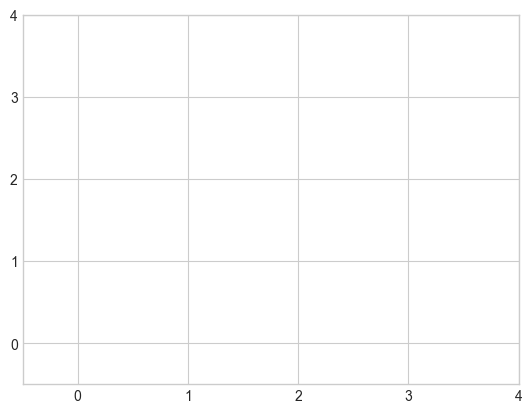

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

size = 5
_x1, _x2 = np.meshgrid(np.arange(size), np.arange(size))
x1, x2 = _x1.ravel(), _x2.ravel()

f = lambda x1, x2: 0.5 * x1 + x2 - 0.3 * x1 * x2
ax.bar3d(x1, x2, 0, 1, 1, f(x1, x2), color='gray', edgecolor='white', shade=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
plt.xticks(np.arange(0.5, size, 1), range(size))
plt.yticks(np.arange(0.5, size, 1), range(size))
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

size = 5
_x1, _x2 = np.meshgrid(np.arange(size), np.arange(size))
x1, x2 = _x1.ravel(), _x2.ravel()

f = lambda x1, x2: 0.5 * x1 + x2 - 0.3 * x1 * x2
ax.bar3d(x1, x2, 0, 1, 1, f(x1, x2), color='gray', edgecolor='white', shade=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
plt.xticks(np.arange(0.5, size, 1), range(size))
plt.yticks(np.arange(0.5, size, 1), range(size))
plt.show()